# app_exército

Produto para ler as informações do arquivo GRB do Modelo Eta em cvs (gerado através do THREDDS) e plotar a velocidade e direção do vento


Informações:
    
    arquivo: eta_05km_2017080700+2017080703.grb
    variáveis: u-component_of_wind_isobaric / v-component_of_wind_isobaric
    latitude=-51.00
    longitude=-84.00
    time=2017-08-07T03:00:00Z
        

In [29]:
from IPython.display import IFrame
IFrame("http://localhost:8787/thredds/ncss/testAll/eta_05km_2017080700+2017080703.grb?var=u-component_of_wind_isobaric&var=v-component_of_wind_isobaric&latitude=-51.00&longitude=-84.00&time_start=2017-08-07T03%3A00%3A00Z&time_end=2017-08-07T03%3A00%3A00Z&vertCoord=&accept=csv", width=800, height=300)

In [30]:
import urllib, csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import metpy.calc as mpcalc

fileremoto = urllib.urlopen('http://localhost:8787/thredds/ncss/testAll/eta_05km_2017080700+2017080703.grb?var=u-component_of_wind_isobaric&var=v-component_of_wind_isobaric&latitude=-51.00&longitude=-84.00&time_start=2017-08-07T03%3A00%3A00Z&time_end=2017-08-07T03%3A00%3A00Z&vertCoord=&accept=csv')

df1=pd.read_csv(fileremoto)


In [26]:
def speed(x):
    return mpcalc.get_wind_speed(x[4],x[5])

def dir(x):
    return mpcalc.get_wind_dir(x[4],x[5]).to('degrees').magnitude

## get_wind_speed
metpy.calc.get_wind_speed(u, v)

Compute the wind speed from u and v-components.

Parameters:	
u (array_like) – Wind component in the X (East-West) direction
v (array_like) – Wind component in the Y (North-South) direction
Returns:	
wind speed (array_like) – The speed of the wind


## get_wind_dir
metpy.calc.get_wind_dir(u, v)

Compute the wind direction from u and v-components.

Parameters:	
u (array_like) – Wind component in the X (East-West) direction
v (array_like) – Wind component in the Y (North-South) direction
Returns:	
wind direction (pint.Quantity) – The direction of the wind, specified as the direction from which it is blowing, with 0 being North.

In [27]:
df1 = df1.assign(speed = df1.apply(speed, axis=1))
df1 = df1.assign(dir = df1.apply(dir, axis=1))

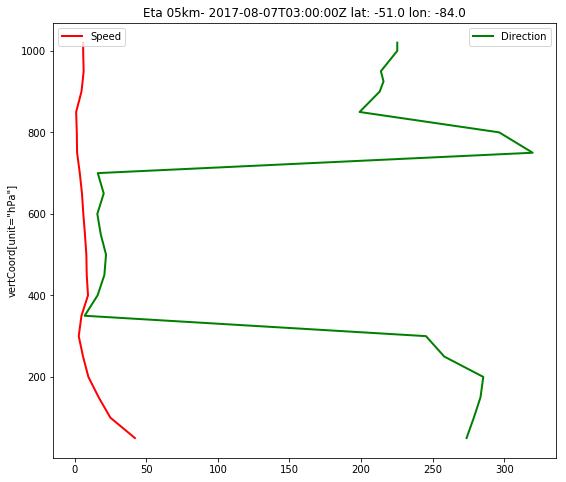

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(9, 8))
line1, = ax.plot(df1['speed'], df1['vertCoord[unit="hPa"]'], 'r', linewidth=2, label="Speed")
line2, = ax.plot(df1['dir'], df1['vertCoord[unit="hPa"]'], 'g', linewidth=2, label="Direction")

lat_title = df1['latitude[unit="degrees_north"]'][0]
lon_title = df1['longitude[unit="degrees_east"]'][0]
time_title = df1['time'][0]

title = "Eta 05km- "+ time_title + " lat: "+lat_title.astype(str) + " lon: "+ lon_title.astype(str)
ax.set_title(title)
ax.set_ylabel('vertCoord[unit="hPa"]')

# Create a legend for the first line.
first_legend = plt.legend(handles=[line1], loc=2)

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

# Create another legend for the second line.
plt.legend(handles=[line2], loc=1)
plt.savefig('Eta05.png')
plt.show()